In [3]:
#Importing the Libraries
import pandas as pd

from datetime import datetime

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
import sklearn as skl

from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mandates
from sklearn import linear_model
# from keras.models import Sequential
# from keras.layers import Dense
# import keras.backend as K
# from keras.callbacks import EarlyStopping
#from keras.optimizers import Adam
# from keras.models import load_model
# from keras.layers import LSTM
# from keras.utils.vis_utils import plot_model

In [4]:
#Get the Dataset
df=pd.read_csv("NewData/BAC2016_2022.csv",na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,22.600000,22.680000,22.200001,22.530001,20.247801,99298100
2017-01-04,22.719999,22.959999,22.600000,22.950001,20.625254,76875100
2017-01-05,22.820000,22.930000,22.350000,22.680000,20.382603,86826400
2017-01-06,22.780001,22.850000,22.559999,22.680000,20.382603,66281500
2017-01-09,22.510000,22.709999,22.400000,22.549999,20.265772,75901500


In [5]:
df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [7]:
#Print the shape of Dataframe  and Check for Null Values
print("Dataframe Shape: ", df. shape)
print("Null Value Present: ", df.isnull().values.any())

Dataframe Shape:  (1354, 6)
Null Value Present:  False


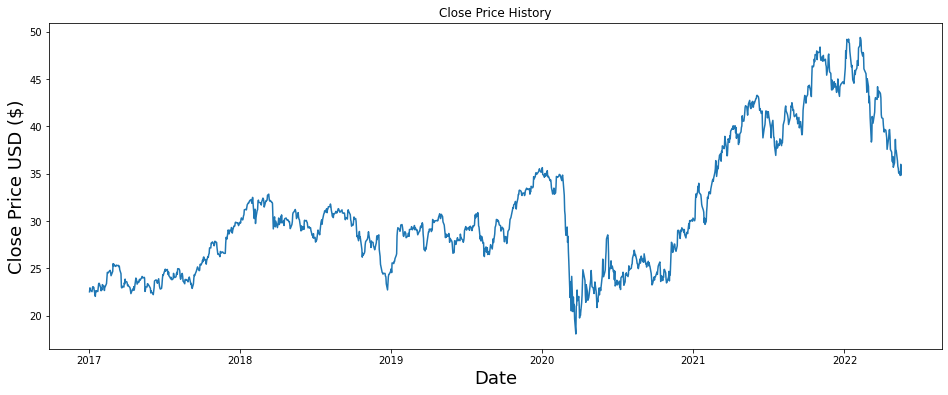

In [8]:
# get the current prices: 

plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [9]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

1287

In [10]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.14217255],
       [0.15559108],
       [0.14696485],
       ...,
       [0.53450481],
       [0.57220452],
       [0.53674123]])

In [11]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

[array([0.14217255, 0.15559108, 0.14696485, 0.14696485, 0.14281147,
       0.15527159, 0.15942492, 0.15463258, 0.15750798, 0.12683702,
       0.14536738, 0.14217255, 0.14568686, 0.14313095, 0.15559108,
       0.16900961, 0.17124603, 0.16869012, 0.15559108, 0.14568686,
       0.15367408, 0.14824277, 0.1664537 , 0.16102239, 0.15399361,
       0.14664536, 0.16102239, 0.1597444 , 0.16996805, 0.19105428,
       0.20766772, 0.20766772, 0.20575079, 0.21405753, 0.21437702,
       0.20766772, 0.19648562, 0.20734824, 0.21086261, 0.2370607 ,
       0.2284345 , 0.23514379, 0.22907348, 0.22779549, 0.22939296,
       0.23226836, 0.23099038, 0.23067089, 0.2313099 , 0.22683705,
       0.22811498, 0.21661344, 0.20319491, 0.15782747, 0.15527159,
       0.15942492, 0.16102239, 0.15814699, 0.17252396, 0.1683706 ])]
[0.1849840515979536]

[array([0.14217255, 0.15559108, 0.14696485, 0.14696485, 0.14281147,
       0.15527159, 0.15942492, 0.15463258, 0.15750798, 0.12683702,
       0.14536738, 0.14217255, 0.145

(1227, 60, 1)

In [12]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1227/1227 [==============================] - 27s 21ms/step - loss: 0.0036


In [13]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

3.3902829047008645

C:\Users\TNBAUTISTA\AppData\Local\Temp\ipykernel_3828\1862797342.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


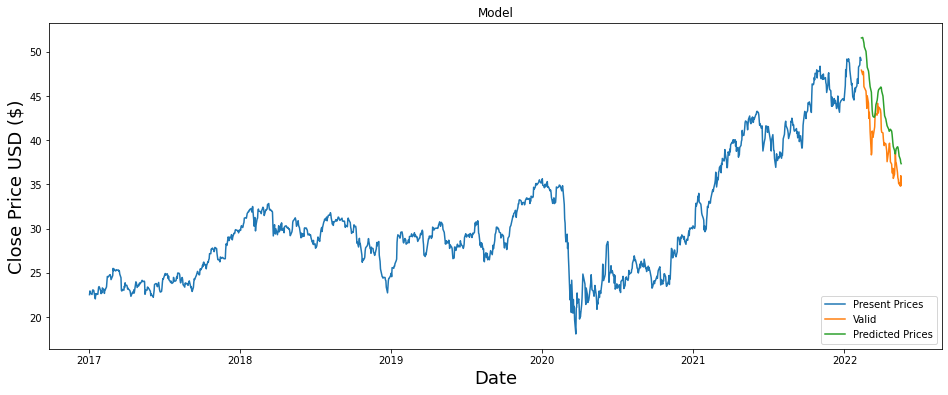

In [16]:
# Plot the future data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Present Prices', 'Valid', 'Predicted Prices'], loc='lower right')
plt.show()

In [17]:
valid

,Close,Predictions
Date,,
2022-02-11,47.919998,51.569416
2022-02-14,47.419998,51.623367
2022-02-15,47.790001,51.435368
2022-02-16,47.680000,51.223740
2022-02-17,46.070000,51.008865
...,...,...
2022-05-12,35.070000,38.641537
2022-05-13,35.169998,38.217499
2022-05-16,34.810001,37.831581
